<a href="https://colab.research.google.com/github/Preritp2/EDA-hotel-booking-project/blob/main/EDAhotelbooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = '/content/drive/MyDrive/colab projrct file/Copy of Hotel Bookings.csv'
df = pd.read_csv(path)

In [17]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
df['stays_in_week_nights'].describe()

count    119390.000000
mean          2.500302
std           1.908286
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64

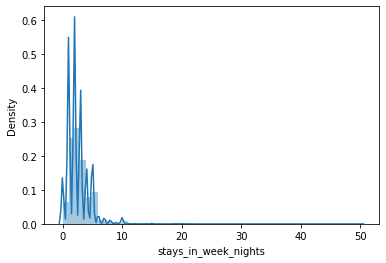

In [15]:
sns.distplot(df['stays_in_week_nights']);

In [18]:
df.groupby(['arrival_date_month', 'arrival_date_year']).count()

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                5428         5428       5428   
                   2017                5661         5661       5661   
August             2015                3889         3889       3889   
                   2016                5063         5063       5063   
                   2017                4925         4925       4925   
December           2015                2920         2920       2920   
                   2016                3860         3860       3860   
February           2016                3891         3891       3891   
                   2017                4177         4177       4177   
January            2016                2248         2248       2248   
                   2017                3681         3681       3681   
July               2015                2776         2776       2776   
                   2016                4572         4572       4572   
                   2017                5313         5313       5313   
June               2016                5292         5292       5292   
                   2017                5647         5647       5647   
March              2016                4824         4824       4824   
                   2017                4970         4970       4970   
May                2016                5478         5478       5478   
                   2017                6313         6313       6313   
November           2015                2340         2340       2340   
                   2016                4454         4454       4454   
October            2015                4957         4957       4957   
                   2016                6203         6203       6203   
September          2015                5114         5114       5114   
                   2016                5394         5394       5394   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   5428   
                   2017                                   5661   
August             2015                                   3889   
                   2016                                   5063   
                   2017                                   4925   
December           2015                                   2920   
                   2016                                   3860   
February           2016                                   3891   
                   2017                                   4177   
January            2016                                   2248   
                   2017                                   3681   
July               2015                                   2776   
                   2016                                   4572   
                   2017                                   5313   
June               2016                                   5292   
                   2017                                   5647   
March              2016                                   4824   
                   2017                                   4970   
May                2016                                   5478   
                   2017                                   6313   
November           2015                                   2340   
                   2016                                   4454   
October            2015                                   4957   
                   2016                                   6203   
September          2015                                   5114   
                   2016                                   5394   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    5428   

In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Text(0.5, 1.0, 'yearly bookings')

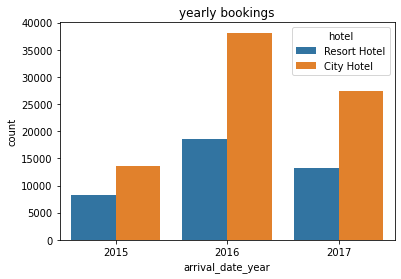

In [20]:
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ('yearly bookings')


In [34]:
df.groupby(['country', 'arrival_date_year']).count()

hotel  is_canceled  lead_time  arrival_date_month  \
country arrival_date_year                                                      
ABW     2016                   1            1          1                   1   
        2017                   1            1          1                   1   
AGO     2015                  50           50         50                  50   
        2016                 187          187        187                 187   
        2017                 125          125        125                 125   
...                          ...          ...        ...                 ...   
ZAF     2017                  39           39         39                  39   
ZMB     2015                   1            1          1                   1   
        2016                   1            1          1                   1   
ZWE     2015                   1            1          1                   1   
        2017                   3            3          3                   3   

                           arrival_date_week_number  \
country arrival_date_year                             
ABW     2016                                      1   
        2017                                      1   
AGO     2015                                     50   
        2016                                    187   
        2017                                    125   
...                                             ...   
ZAF     2017                                     39   
ZMB     2015                                      1   
        2016                                      1   
ZWE     2015                                      1   
        2017                                      3   

                           arrival_date_day_of_month  stays_in_weekend_nights  \
country arrival_date_year                                                       
ABW     2016                                       1                        1   
        2017                                       1                        1   
AGO     2015                                      50                       50   
        2016                                     187                      187   
        2017                                     125                      125   
...                                              ...                      ...   
ZAF     2017                                      39                       39   
ZMB     2015                                       1                        1   
        2016                                       1                        1   
ZWE     2015                                       1                        1   
        2017                                       3                        3   

                           stays_in_week_nights  adults  children  ...  \
country arrival_date_year                                          ...   
ABW     2016                                  1       1         1  ...   
        2017                                  1       1         1  ...   
AGO     2015                                 50      50        50  ...   
        2016                                187     187       187  ...   
        2017                                125     125       125  ...   
...                                         ...     ...       ...  ...   
ZAF     2017                                 39      39        39  ...   
ZMB     2015                                  1       1         1  ...   
        2016                                  1       1         1  ...   
ZWE     2015                                  1       1         1  ...   
        2017                                  3       3         3  ...   

                           deposit_type  agent  company  days_in_waiting_list  \
country arrival_date_year                                                       
ABW     2016                          1      1        0                     1   
        20

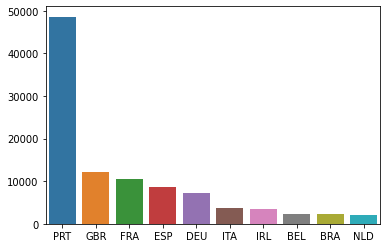

In [26]:
sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))